In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import constants
from utils import attribute_utils, data_utils
pd.set_option('display.max_columns', None)
%reload_ext autoreload
%autoreload 2

In [22]:
data = data_utils.load_dataset()
data.head(0)

,ANO,MÊS,TERRITÓRIO,AIS,NATUREZA A ANALISAR,ENVIADO PARA RELINT / PRONT. FT VIDAS,NOME,VULGO,SEXO,NOME DO PAI,NOME DA MÃE,DATA DE NASCIMENTO,IDADE,N º RG,ÓRGÃO EXPEDIDOR,ESTADO EXPEDIDOR,NATURALIDADE (Cidade),NATURALIDADE (UF),CPF,ENDEREÇO DO ALVO,FOTOS,RG NO SISTEMA,PRONTUÁRIO IITB,COMARCA,PROCESSO EM SEGREDO DE JUSTIÇA,DATA DA ÚLTIMA MOVIMENTAÇÃO DO PROCESSO,TIPO DE PRISÃO DECRETADA,DATA EXPEDIÇÃO DO MANDADO,TIPIFICAÇÃO,SITUAÇÃO DO MANDADO,CÓPIA DO MANDADO,VÍTIMA,BAIRRO DO FATO,DATA DO FATO,Nº BOE - INFOPOL,TOTAL DE VÍTIMAS-CONSUMADO,TOTAL DE VÍTIMAS-TENTADO,CIVIL,CARCERÁRIO,CRIMINAL,CAPTURAS,CNJ,TJPE,INFOPOL,INFOSEG,SEC. SAÚDE,GACE,ALVO PRIORITÁRIO,SITE SDS,BI CVLI,BI TENTATIVA-CVLI,BI NARCOTRÁFICO,BI CVP,BI OUTROS,SUBTOTAL BI,MP CVLI,MP TENTATIVA-CVLI,MP NARCOTRÁFICO,MP CVP,MP OUTROS,SUBTOTAL MP,PROCESSO CVLI,PROCESSO TENTATIVA-CVLI,PROCESSO NARCOTRÁFICO,PROCESSO CVP,PROCESSO OUTROS,SUBTOTAL PROCESSOS,PERICULOSIDADE (BI - MP - PROCESSO),STATUS CARCERÁRIO,DATA DA PRISÃO ou REGISTRO NO CARCERÁRIO,DATA DA ÚLTIMA MOVIMENTAÇÃO NO CARCERÁRIO,UNIDADE PRISIONAL ATUAL,PRONTUÁRIO SERES,DATA DE EVASÃO DO SISTEMA CARCERÁRIO,DATA DA EXPEDIÇÃO DO ALVARÁ,MOTIVO DA SOLTURA,OUTROS PROCESSOS NO TJPE,QUANTIDADE DE PROCESSOS NO TJPE,DATA ÚLTIMA ATUALIZAÇÃO,Mandados inseridos (CVLI) para análise (marcador)


In [23]:
data.head(10)[['AIS','DATA DE EVASÃO DO SISTEMA CARCERÁRIO']]

In [37]:
data.shape

(3065, 80)

In [66]:
data.groupby(by='NOME')

In [27]:
data.head(10)['SITUAÇÃO DO MANDADO']
ativos = data.loc[data['SITUAÇÃO DO MANDADO'] == 'ATIVO']
ativos.shape

(3065, 80)

In [20]:
def relevancyData(row):
    functions = [attribute_utils.evadido, attribute_utils.diasAposEvasao, attribute_utils.periculosidade, attribute_utils.prioritario, attribute_utils.qtdProcessos, attribute_utils.totalVitmasConsumado, attribute_utils.totalVitmasTentado, attribute_utils.prisaoPreventiva, attribute_utils.prisaoCondenatoria, attribute_utils.mpCVLI]
    return pd.Series([function(row) for function in functions])
data.apply(relevancyData, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,8.0,1.0,2,2,0.0,1.0,0.0,2.0
1,1.0,1209.0,4.0,0.0,0,1,0.0,0.0,1.0,1.0
2,0.0,0.0,5.0,0.0,1,1,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0,1,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0,0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0


+ EV = Evadido {0,1}
+ ΔTev = Dias após evasão ℕ
+ P = Periculosidade ℤ
+ AP = Alvo prioritário {0,1}
+ QP = Quantidade processos ℕ
+ TVC = Total de vítimas - consumado ℕ
+ TVT = Total de vítimas - tentado ℕ
+ PP = Preventiva {0,1}
+ PC = Condenatória {0,1}
+ CVLImp = MP CVLI ℕ
+ Pcvli = Probabilidade de cometer CVLI [0,1]

+ EC = Endereço conhecido {0,1}
+ FT = Possui foto {0,1}
+ RG = RG no sistema {0,1}
+ PD = Prisão decretada {0,1}
+ ΔTexp = Dias após expedição ℕ
+ MA = Mandado ativo {0,1}
+ SC = Sistema carcerário (prontuário SERES) {0,1}

In [14]:
n=data['QUANTIDADE DE PROCESSOS NO TJPE'].iloc[0]

In [41]:
data[['PRONTUÁRIO SERES','CARCERÁRIO']]

,PRONTUÁRIO SERES,CARCERÁRIO
0,-,NaN
1,14000063,X
2,78400088,X
3,2011546,X
4,8006802,X
5,78700040,X


In [16]:
from fitness import FuncaoRelevancia, FuncaoViabilidade, FitnessSum, FitnessMult

In [17]:
Kr, Kv = constants.RELEVANCY_WEIGHTS, constants.VIABILITY_WEIGHTS
R = FuncaoRelevancia(Kr)
V = FuncaoViabilidade(Kv)
fitness1 = FitnessSum(1,1,1,Kr,Kv,data)
fitness2 = FitnessMult(1,1,1,Kr,Kv,data)
def fitnessInd(row):
    return (1-np.exp(-V(row)))*R(row)

In [18]:
pd.concat([data.apply(R, axis=1), data.apply(V, axis=1), data.apply(fitnessInd, axis=1)], axis=1).head(10)

,0,1,2
0,1.891892,0.444444,0.678848
1,0.959459,1.000000,0.606494
22,0.972973,1.000000,0.615036
24,6.081081,0.814815,3.388857
28,6.162162,1.000000,3.895229
31,4.756757,0.814815,2.650839
34,1.500000,0.444444,0.538229
37,1.905405,0.629630,0.890226
56,0.972973,0.444444,0.349122
66,1.054054,0.814815,0.587402


In [94]:
chr = [0,4,2,3]
fitness1(chr), fitness2(chr)

(4.591841841841842, 2.14449261264333)

In [95]:
chr = [1,0,4,2]
np.sum(data.iloc[chr].apply(R, axis=1).values)

9.986486486486488

In [19]:
from tests import testeGA

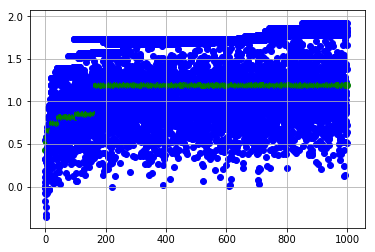

In [97]:
testeGA.testWithFakeFitness(pop_size=10, generations_to_run=1000, random_seed=123)

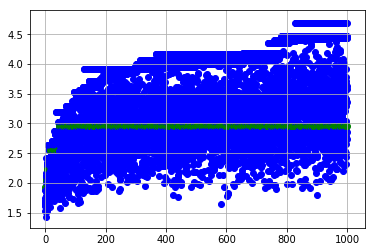

In [21]:
testeGA.testWithRealFitness(fitness1, len(data), pop_size=10, generations_to_run=1000, random_seed=123)

In [ ]:
testeGA.testWithRealFitness(fitness2, len(data), pop_size=10, generations_to_run=1000, random_seed=123)

In [229]:
np.random.choice(['a','b','c'], 2, replace=False)

array(['b', 'a'], dtype='<U1')

In [21]:
np.random.seed(123)
np.random.randn(10)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])